# Gradient Descent Intro
 <p>

In [226]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
# from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [227]:
def line(a,b,x): return a*x+b
def parabola(a,b,x): return -(a*x)**2+5*x+b

In [228]:
a=3.
b=8.

In [229]:
n=30
x = random(n)
y = line(a,b,x)

In [210]:
x

array([0.4118, 0.8889, 0.0508, 0.4335, 0.3427, 0.193 , 0.7595, 0.1067, 0.1561, 0.808 , 0.084 ,
       0.8528, 0.4644, 0.6582, 0.4158, 0.9284, 0.5741, 0.0069, 0.2267, 0.8019, 0.0262, 0.9614,
       0.0061, 0.7855, 0.2547, 0.1794, 0.3508, 0.8758, 0.1454, 0.6062])

In [211]:
y
for num, xValue in enumerate(x, start=0):
    print("({}, {}),".format(xValue, y[num]))

(0.4117912871094169, 9.23537386132825),
(0.8889306055333263, 10.666791816599979),
(0.05078355146813984, 8.152350654404419),
(0.43350466102296736, 9.300513983068901),
(0.34268247064642277, 9.02804741193927),
(0.19302968736734916, 8.579089062102048),
(0.7594811630810215, 10.278443489243065),
(0.10666326581697971, 8.319989797450939),
(0.15614732262602904, 8.468441967878087),
(0.8079730358131594, 10.423919107439477),
(0.08400902342660943, 8.252027070279828),
(0.8527816978802192, 10.558345093640657),
(0.46443096149339513, 9.393292884480186),
(0.6582035384545516, 9.974610615363655),
(0.4158248102414547, 9.247474430724363),
(0.9283750614228911, 10.785125184268672),
(0.5740713330793388, 9.722213999238017),
(0.006912303295415478, 8.020736909886246),
(0.22669257658018815, 8.680077729740564),
(0.801944735332342, 10.405834205997026),
(0.026213742285028818, 8.078641226855087),
(0.9614423925755282, 10.884327177726584),
(0.006072819452324074, 8.018218458356973),
(0.7855038525182721, 10.35651155755481

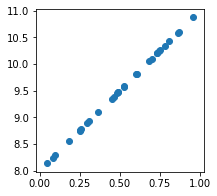

In [230]:
plt.scatter(x,y)

In [231]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, line(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [232]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.109583689458217

In [233]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [234]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [235]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani